In [ ]:
# Biblioteca para construção de modelos preditivos e fonte do conjunto de dados

%pip install sklearn

%pip install featuretools

In [84]:
# Importação de bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [23]:
# Criação do conjunto de dados boston

with warnings.catch_warnings(): 
    warnings.filterwarnings("ignore")
    boston = load_boston()

In [24]:
# Descrição dos dados
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
# Criação do DataFrame do conjunto de dados 
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['PREÇO']=boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PREÇO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
# Informações sobre o conjunto de dados
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PREÇO    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
# Estatísticas descritivas do conjunto de dados
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PREÇO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Assimetria(Skewness)  5.223148798243851
Curtose  37.13050912952203


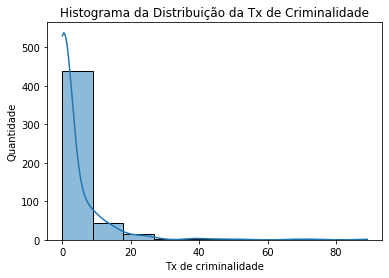

In [48]:
# Histograma da taxa de criminalidade por cidade

g1 = sns.histplot(df_boston['CRIM'],bins=10,kde=True)
g1.set(xlabel="Tx de criminalidade",ylabel="Quantidade",title="Histograma da Distribuição da Tx de Criminalidade")
assimetria = df_boston['CRIM'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['CRIM'].kurtosis()
print('Curtose ', curtose)


É possível observar que em mais de 500 situações a taxa de criminalidade é próxima a 0. Como também pode ser visto na análise descritiva do conjunto de dados, onde 50% dos valores da taxa de criminalidade estão inferiores a 0.256510.

C:\Users\ioko_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Limite com o rio'),
 Text(0, 0.5, 'Quantidade de Terrenos'),
 Text(0.5, 1.0, 'Quantidade de Terrenos/Limite com o rio')]

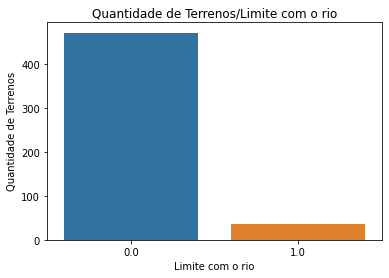

In [46]:
# Gráfico de barras mostrando a quantidade de terrenos com limite ou não com o rio

g2 = sns.countplot(df_boston['CHAS'])
g2.set(xlabel="Limite com o rio",ylabel="Quantidade de Terrenos",title="Quantidade de Terrenos/Limite com o rio")

Na grande maioria dos casos os terrenos não tem limite com o rio.

Assimetria(Skewness)  0.7293079225348787
Curtose  -0.06466713336542629


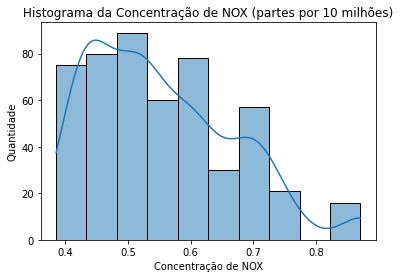

In [50]:
# Histograma da concentração de NOX

g1 = sns.histplot(df_boston['NOX'],bins=10,kde=True)
g1.set(xlabel="Concentração de NOX",ylabel="Quantidade",title="Histograma da Concentração de NOX (partes por 10 milhões)")
assimetria = df_boston['NOX'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['NOX'].kurtosis()
print('Curtose ', curtose)

Podemos observar uma distribuição com vários picos, sem achatamento nas pontas da curva. Onde os valores não se concentram próximos a média. Diferente do ocorrido na taxa de criminalidade.

Assimetria(Skewness)  0.40361213328874385
Curtose  1.8915003664993404


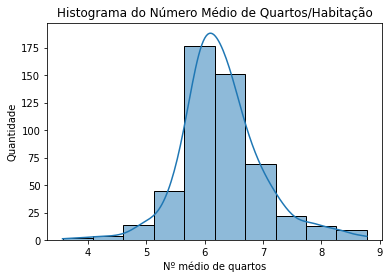

In [53]:
# Histograma do número médio de quartos

g1 = sns.histplot(df_boston['RM'],bins=10,kde=True)
g1.set(xlabel="Nº médio de quartos",ylabel="Quantidade",title="Histograma do Número Médio de Quartos/Habitação")
assimetria = df_boston['RM'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['RM'].kurtosis()
print('Curtose ', curtose)

É possível observar uma distribuição de valores bem homogenea ao redor da média, onde a maioria das habitações tem em média 6 quartos.

Assimetria(Skewness)  -0.5989626398812962
Curtose  -0.9677155941626912


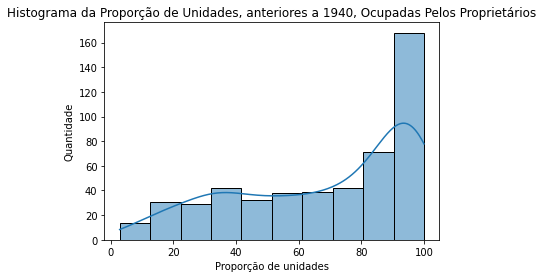

In [55]:
g1 = sns.histplot(df_boston['AGE'],bins=10,kde=True)
g1.set(xlabel="Proporção de unidades",ylabel="Quantidade",title="Histograma da Proporção de Unidades, anteriores a 1940, Ocupadas Pelos Proprietários")
assimetria = df_boston['AGE'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['AGE'].kurtosis()
print('Curtose ', curtose)

Há uma tendência da maioria das residências mais antigas ainda serem ocupadas pelos seus proprietários, essa tendência é mostrada no gráfico pois em mais de 160 ocasiões mais de 90% das habitações são ocupadas pelos proprietários.

Assimetria(Skewness)  1.0117805793009007
Curtose  0.4879411222443908


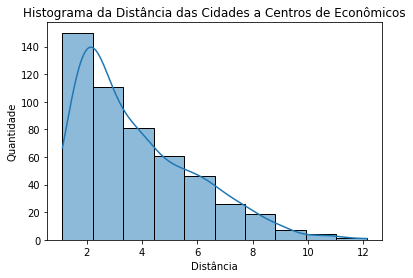

In [56]:
g1 = sns.histplot(df_boston['DIS'],bins=10,kde=True)
g1.set(xlabel="Distância",ylabel="Quantidade",title="Histograma da Distância das Cidades a Centros de Econômicos")
assimetria = df_boston['DIS'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['DIS'].kurtosis()
print('Curtose ', curtose)

A distribuição apresenta uma forte tendência das cidades se situarem próximas aos 5 centros de emprego ou cindo centros econômicos.

Assimetria(Skewness)  1.0048146482182057
Curtose  -0.8672319936034931


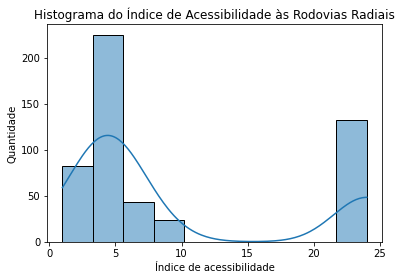

In [60]:
g1 = sns.histplot(df_boston['RAD'],bins=10,kde=True)
g1.set(xlabel="Índice de acessibilidade",ylabel="Quantidade",title="Histograma do Índice de Acessibilidade às Rodovias Radiais")
assimetria = df_boston['RAD'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['RAD'].kurtosis()
print('Curtose ', curtose)

Assimetria(Skewness)  0.669955941795016
Curtose  -1.1424079924768082


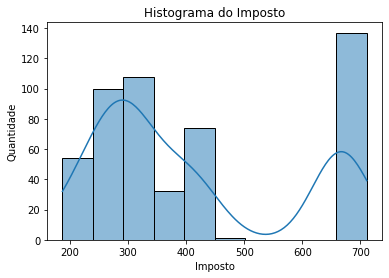

In [59]:
g1 = sns.histplot(df_boston['TAX'],bins=10,kde=True)
g1.set(xlabel="Imposto",ylabel="Quantidade",title="Histograma do Imposto")
assimetria = df_boston['TAX'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['TAX'].kurtosis()
print('Curtose ', curtose)

A distribuição do índice de acessibilidade às rodovias e do imposto cobrado é semelhante. Mostrando que locais com maiores taxas de imposto normalmente terão melhores localização quanto a mobilidade urbana.

Assimetria(Skewness)  -0.8023249268537809
Curtose  -0.28509138330538875


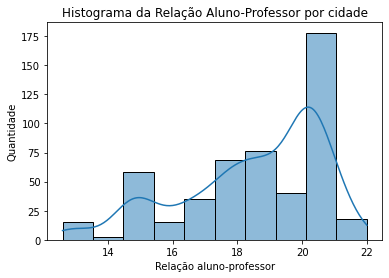

In [61]:
g1 = sns.histplot(df_boston['PTRATIO'],bins=10,kde=True)
g1.set(xlabel="Relação aluno-professor",ylabel="Quantidade",title="Histograma da Relação Aluno-Professor por cidade")
assimetria = df_boston['PTRATIO'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['PTRATIO'].kurtosis()
print('Curtose ', curtose)

Apesar de não ser uma distribuição muito uniforme, ainda é possível ver que a maioria das cidades tem uma relação aluno-professor elevada, ou seja, muitos alunos e poucos professores. Esse fato pode evidenciar problemas no sistema educacional dessas cidades, como super lotação de escolas, por exemplo.

Assimetria(Skewness)  -2.8903737121414492
Curtose  7.226817549260753


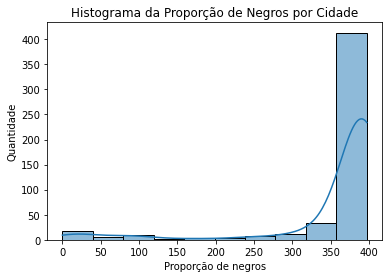

In [62]:
g1 = sns.histplot(df_boston['B'],bins=10,kde=True)
g1.set(xlabel="Proporção de negros",ylabel="Quantidade",title="Histograma da Proporção de Negros por Cidade")
assimetria = df_boston['B'].skew()
print('Assimetria(Skewness) ', assimetria)
curtose = df_boston['B'].kurtosis()
print('Curtose ', curtose)

Na grande maioria das cidades a população negra é a maioria.

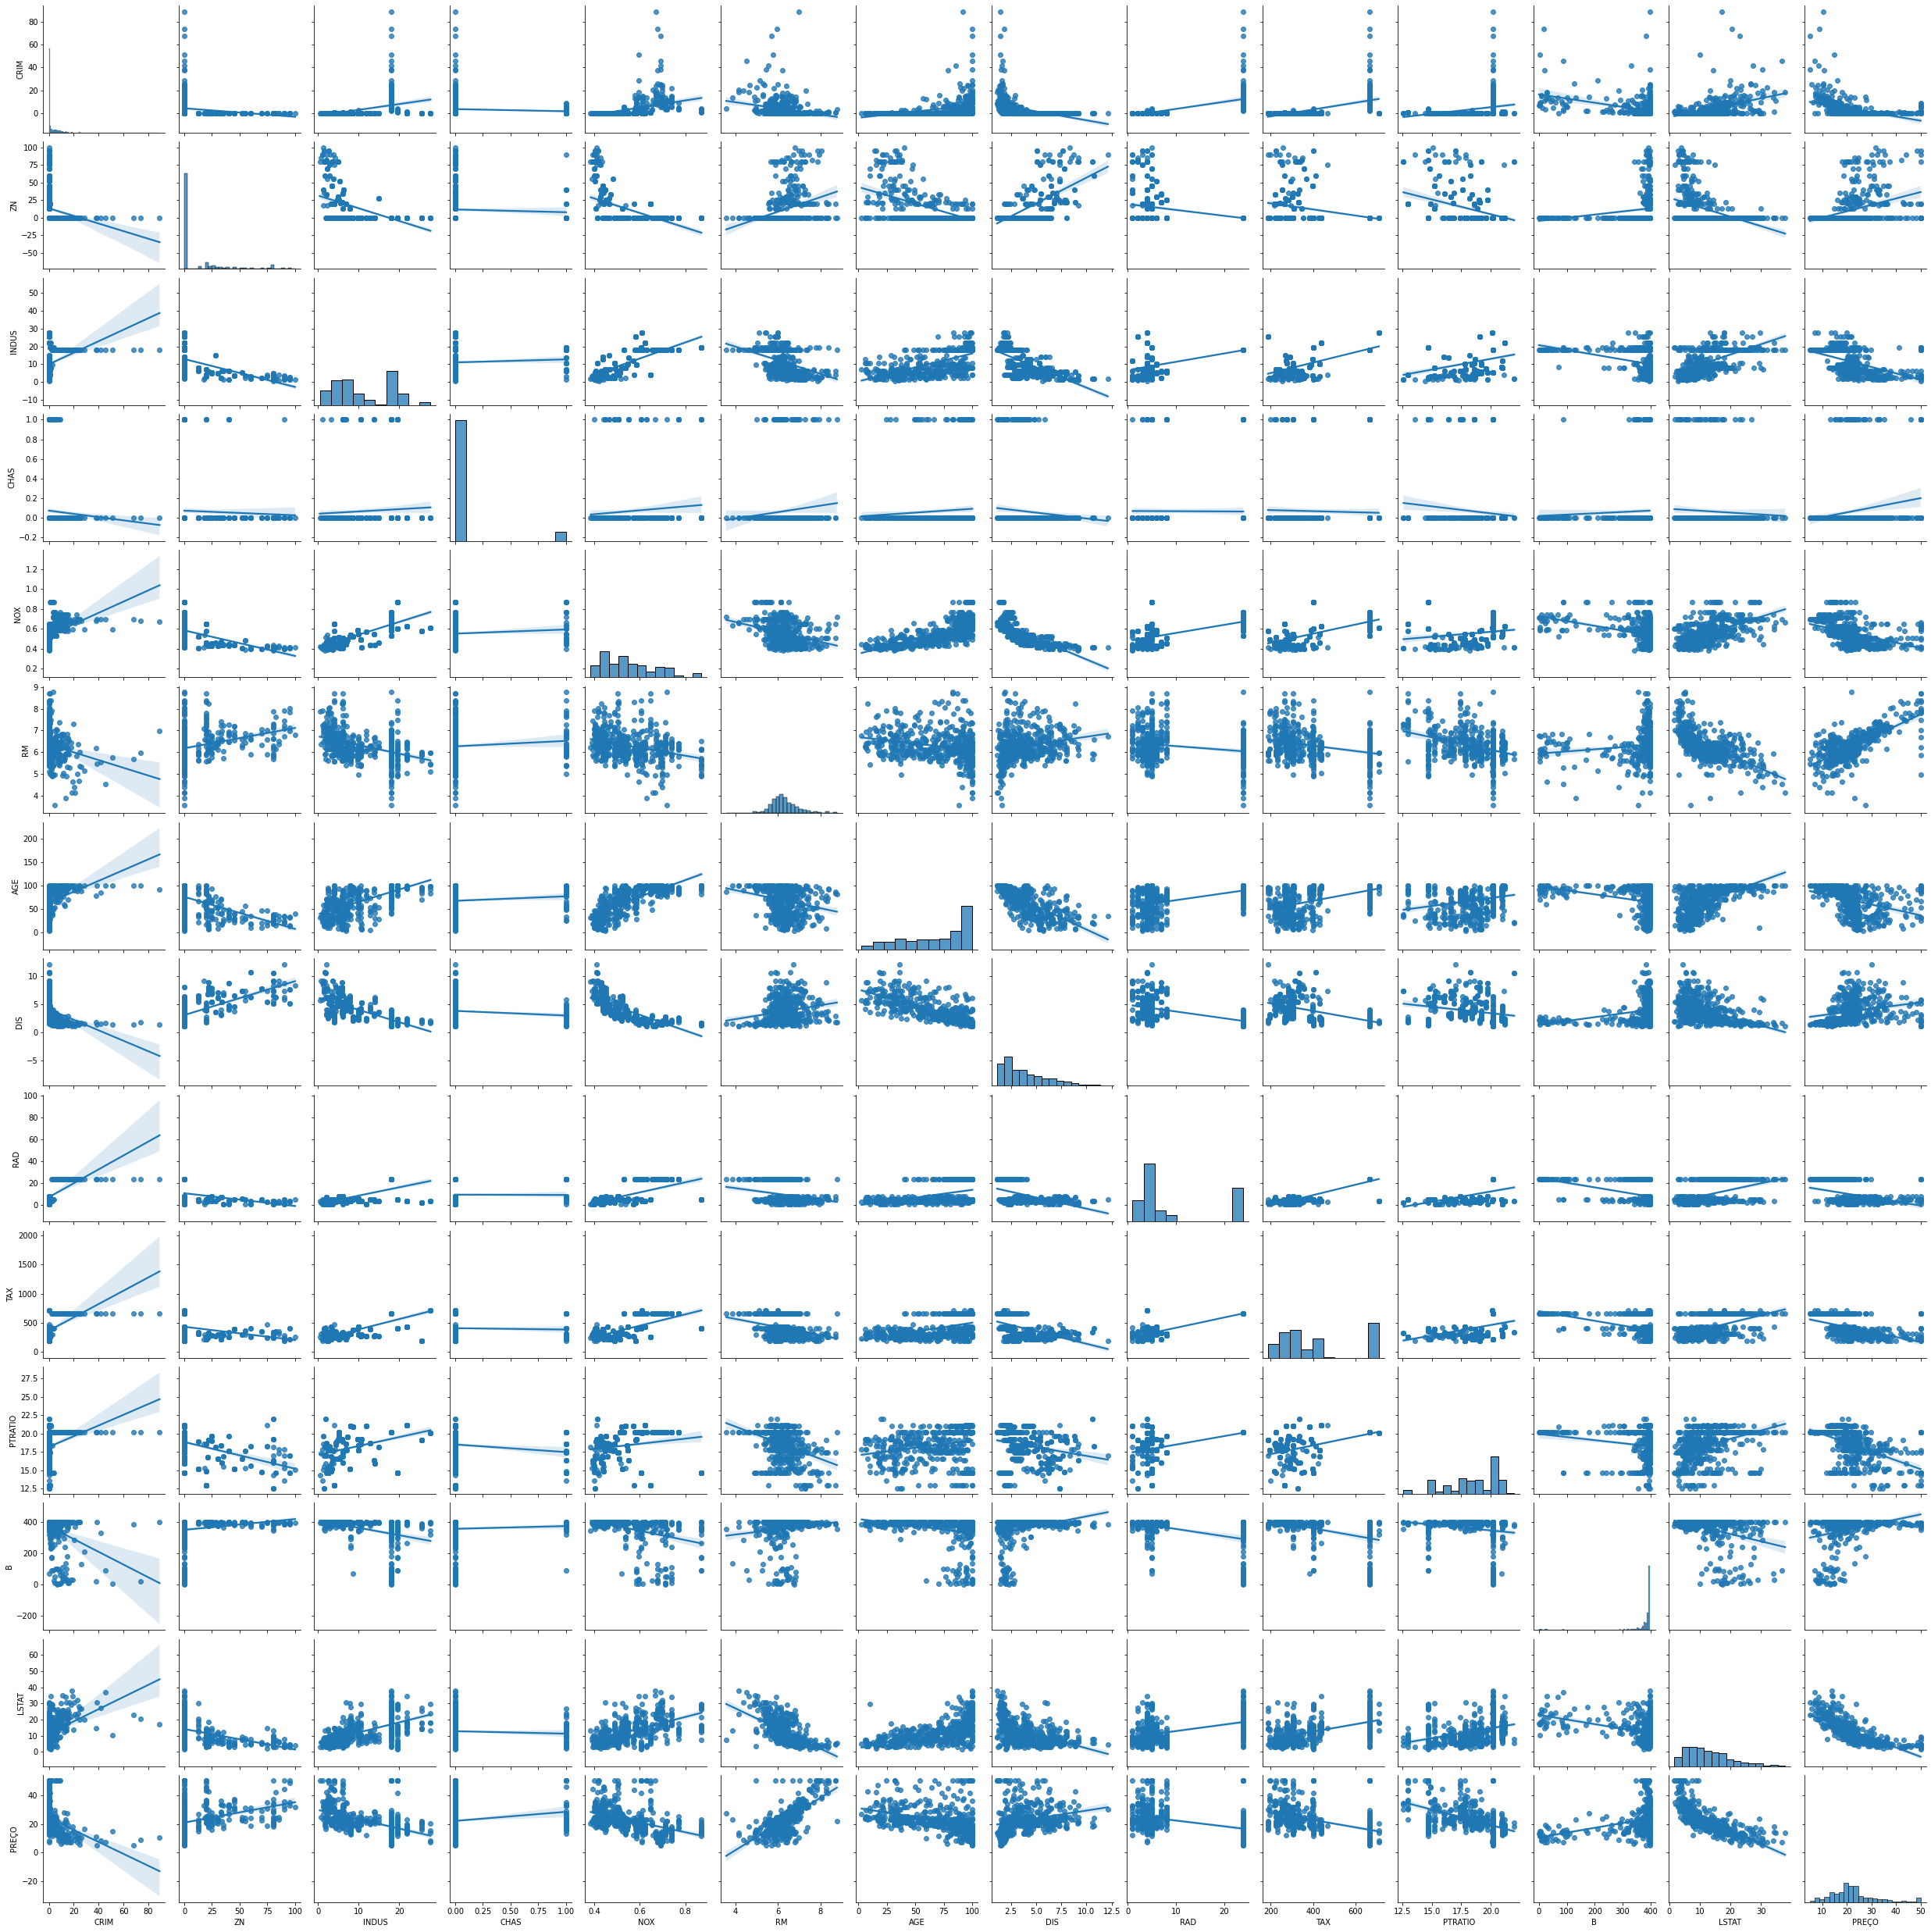

In [66]:
# Análise multivariada

sns.pairplot(df_boston,kind='reg')

A análise acima mostra a relação entre as variáveis do nosso banco de dados. Onde podemos ver que a medida que se aumenta a taxa de criminalidade em uma cidade, os valores dos preços das habitações decrescem. Com o aumento do número de quartos os valores tendem a aumentar. Assim como quando temos cidades mais bem localizadas em relação a rodovias e próximas aos centros economicos, os valores das habitações tendem a aumentar.

In [75]:
# Divisão dos grupos de treino e teste

X = boston.data
Y = boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=5)

[Text(0.5, 0, 'Preços Reais'),
 Text(0, 0.5, 'Preços Previstos'),
 Text(0.5, 1.0, 'Preços Reais x Preços Previstos')]

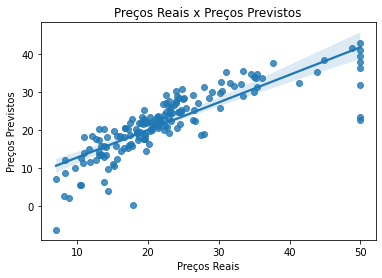

In [83]:
# Regressão linear

lm = LinearRegression()
lm.fit(X_train,Y_train)

Y_pred = lm.predict(X_test)

g4 = sns.regplot(x=Y_test,y=Y_pred,)
g4.set(xlabel="Preços Reais",ylabel="Preços Previstos",title="Preços Reais x Preços Previstos")



Como podemos observar, a medida que os valores reais crecem, os valores previstos também crescem, mostrando um bom fit entre o modelo e o real.

In [86]:
# Cálculo do erro

mse = mean_squared_error(Y_test,Y_pred)
print(f'O erro médio quadrático para o modelo linear foi de {round(mse,2)}')

O erro médio quadrático para o modelo linear foi de 28.53
